## **Decision Tree**


### **Group Member 4**
1. Arif Saputra
2. Fadly Sofyansyah
3. Adam Setiawan
4. Fata Dwi Putra
5. Anom Innadanuansyah

### **Import Libraries**

**numpy** is imported as **np**, used for **efficient numeric operations**

**matplotlib.pyplot** is imported as **plt**, used for **plotting and data visualization**

**pandas** is imported as **pd**, used for **data manipulation and analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Reading The Dataset**


In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### **Preliminary Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(918, 12)

In [ ]:
data.size

11016

### **Exploratory Data Analysis**

#### Segregating Columns into Groups




*   **Numerical** -> Age, RestingBP, Cholesterol, MaxHR, OldPeak
*   **Categorical** -> Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease





**num** variable to store numerical fields

**cat** variable to store categorical fields

In [ ]:
num = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat = ['Sex', 'ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

#### Checking for Outliers

an outlier is a value from the data outside the range or outside the expected value

In [ ]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in num:
    count_outliers(data, i)

No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16


### **Data Preprocessing**

in this case we convert the values ​​in the column to numeric values

Import the **LabelEncoder** module from the **sklearn.preprocessing** library

In [ ]:
from sklearn.preprocessing import LabelEncoder

Creates an instance of **LabelEncoder()** with the name **enc**

In [ ]:
enc = LabelEncoder()

Use **enc** to encode the 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope' fields in the DataFrame **data**.

The encoding results will be saved back to the same column in the DataFrame **data**

In [ ]:
data['Sex'] = enc.fit_transform(data['Sex'].values)
data['ChestPainType'] = enc.fit_transform(data['ChestPainType'].values)
data['RestingECG'] = enc.fit_transform(data['RestingECG'].values)
data['ExerciseAngina'] = enc.fit_transform(data['ExerciseAngina'].values)
data['ST_Slope'] = enc.fit_transform(data['ST_Slope'].values)

Check the Data

In [ ]:
data.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
735,49,1,2,120,188,0,1,139,0,2.0,1,1
388,55,1,0,140,0,0,1,83,0,0.0,1,1
408,59,1,0,110,0,1,1,94,0,0.0,1,1
221,51,0,0,160,303,0,1,150,1,1.0,1,1
494,60,1,0,142,216,0,1,110,1,2.5,1,1
552,71,1,2,144,221,0,1,108,1,1.8,1,1
270,45,1,0,120,225,0,1,140,0,0.0,2,0
879,48,1,1,110,229,0,1,168,0,1.0,0,1
754,57,1,0,132,207,0,1,168,1,0.0,2,0
333,40,1,0,95,0,1,2,144,0,0.0,2,1


### **Split Dataset**

in this process we divide the dataset into training data **train set** and test data **test set** randomly.

Variable **x** will contain the **features/attributes** that will be used as **input to train** the model

In [ ]:
x = data.drop(["HeartDisease"], axis=1)

Variable **y** will contain the **target value** which will be used when **training and testing** the model

In [ ]:
y = data['HeartDisease']

Import the **train_test_split** module from the **sklearn.model_selection** library

In [ ]:
from sklearn.model_selection import train_test_split

Split the dataset into train and test sets

**x**: features/input variables

**y**: target/output variable

**test_size**: proportion of the dataset to be used for testing (0.3 = 30% for testing)

**random_state**: seed for random number generation, ensures reproducibility of the split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### **Scaling Dataset**

the purpose of this process is to perform feature scaling on the training data and test data.

Feature scaling using **StandardScaler** aims to change every feature in the data to have a **mean of 0** and a **standard deviation of 1**

Import the **StandardScaler** module from the **sklearn.preprocessing** library

In [ ]:
from sklearn.preprocessing import StandardScaler

Creates a **sc** object of the **StandardScaler** class

In [ ]:
sc = StandardScaler()

Perform feature scaling on **training data** and **test data** by calling the **fit_transform method**

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Check the Data

In [ ]:
print(x_train)

[[-2.28534906  0.51601569 -0.83123456 ... -0.83034552 -0.84052373
  -0.59059305]
 [-1.86194697  0.51601569  1.27806421 ... -0.83034552  0.10434798
  -0.59059305]
 [-0.27418913  0.51601569 -0.83123456 ... -0.83034552  1.23819403
  -0.59059305]
 ...
 [ 0.36091401 -1.93792558 -0.83123456 ... -0.83034552 -0.84052373
   1.03670626]
 [ 1.10186767  0.51601569 -0.83123456 ...  1.20431793  2.93896311
  -2.21789237]
 [-0.69759122  0.51601569  1.27806421 ... -0.83034552 -0.84052373
   1.03670626]]


In [ ]:
print(y_train)

76     1
48     0
304    1
263    1
744    1
      ..
835    1
192    0
629    0
559    1
684    1
Name: HeartDisease, Length: 642, dtype: int64


### **Naive Bayes**

in this section we use the naive Bayes Classification to classify the data

Import the **DecisionTreeClassifier** module from the **sklearn.tree** library

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Creates a classifier object as an instance of **DecisionTreeClassifier**

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

Make predictions on the **x_test** data and the prediction results will be stored in the **y_pred** variable

In [ ]:
y_pred = classifier.predict(x_test)

#### Accuracy Check and Evaluation

in this process we calculate the confusion matrix, accuracy, and classification report from the predicted results compared to the actual value

Import the **confusion_matrix, accuracy_score, classification_report**  module from the **sklearn.metrics** library

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Using the confusion_matrix function to calculate the confusion matrix by comparing the actual value **y_test** with the predicted result **y_pred** then the results of the confusion matrix will be stored in the **cm** variable

In [ ]:
cm = confusion_matrix(y_test, y_pred)

This command will print the number of correct predictions and the number of incorrect predictions based on the confusion matrix

In [ ]:
print("Prediksi Benar   :", cm[0, 0] + cm[1, 1], "Data")
print("Prediksi Salah   :", cm[0, 1] + cm[1, 0], "Data")

Prediksi Benar   : 219 Data
Prediksi Salah   : 57 Data


Compares the actual label **y_test** with the predicted label **y_pred** and calculates prediction accuracy by comparing the number of correct predictions to the total amount of data

In [ ]:
akurasi = accuracy_score(y_test, y_pred)

Print the accuracy value in the form of a percentage

In [ ]:
print("Akurasi    : ", akurasi*100, "%")

Akurasi    :  79.34782608695652 %


Prints a classification report containing evaluation metrics such as precision, recall, and F1-score for each class in the classification problem

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       113
           1       0.85      0.79      0.82       163

    accuracy                           0.79       276
   macro avg       0.79      0.80      0.79       276
weighted avg       0.80      0.79      0.79       276



#### **Visualize Data Results**


Import the **export_graphviz** module from the **sklearn.tree** library

In [ ]:
from sklearn.tree import export_graphviz

Generates a graphical representation of the classification model used (classifier) ​​in DOT format. This graphical representation can be used to visualize the structure of the decision tree formed by the model.

In [ ]:
export_graphviz(classifier, out_file="tree_heart.dot", class_names=["1", "0"], feature_names=x.columns, impurity=False, filled=True)

Reads the previously generated DOT file ("tree_heart.dot") and generates a graphical visualization that can be displayed in the notebook

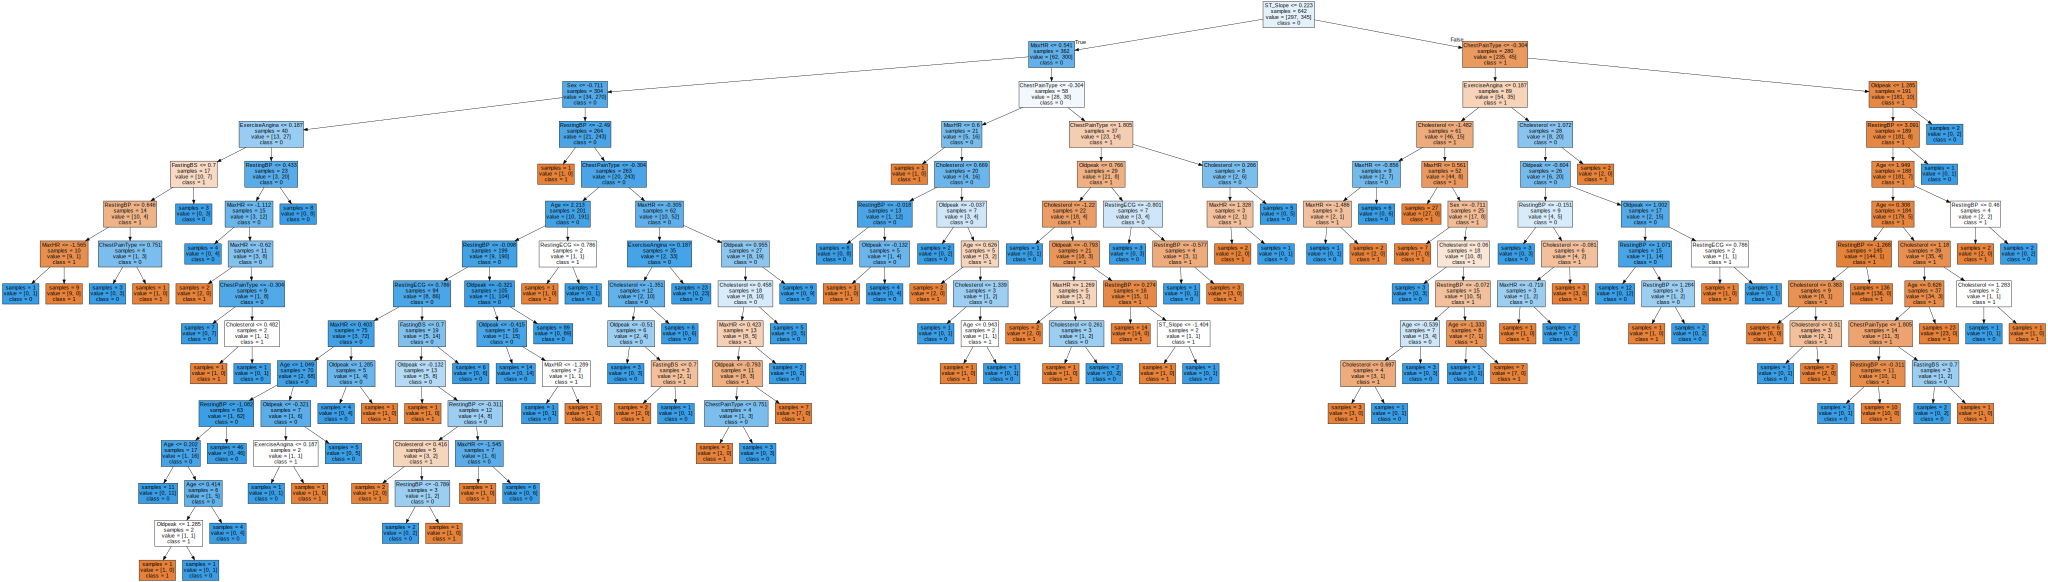

In [ ]:
import graphviz

with open("tree_heart.dot") as fig:
  dot_graph = fig.read()
graphviz.Source(dot_graph)

Import the **pydotplus** library

Import the **Image** module from the **IPython.display** library

In [ ]:
import pydotplus
from IPython.display import Image

Reads DOT files and generates graphical visualizations in PNG format.

In [ ]:
graph = pydotplus.graph_from_dot_file("tree_heart.dot")
graph.write_png("tree_heart.png")

True

Displays the image "tree_heart.png" in the notebook

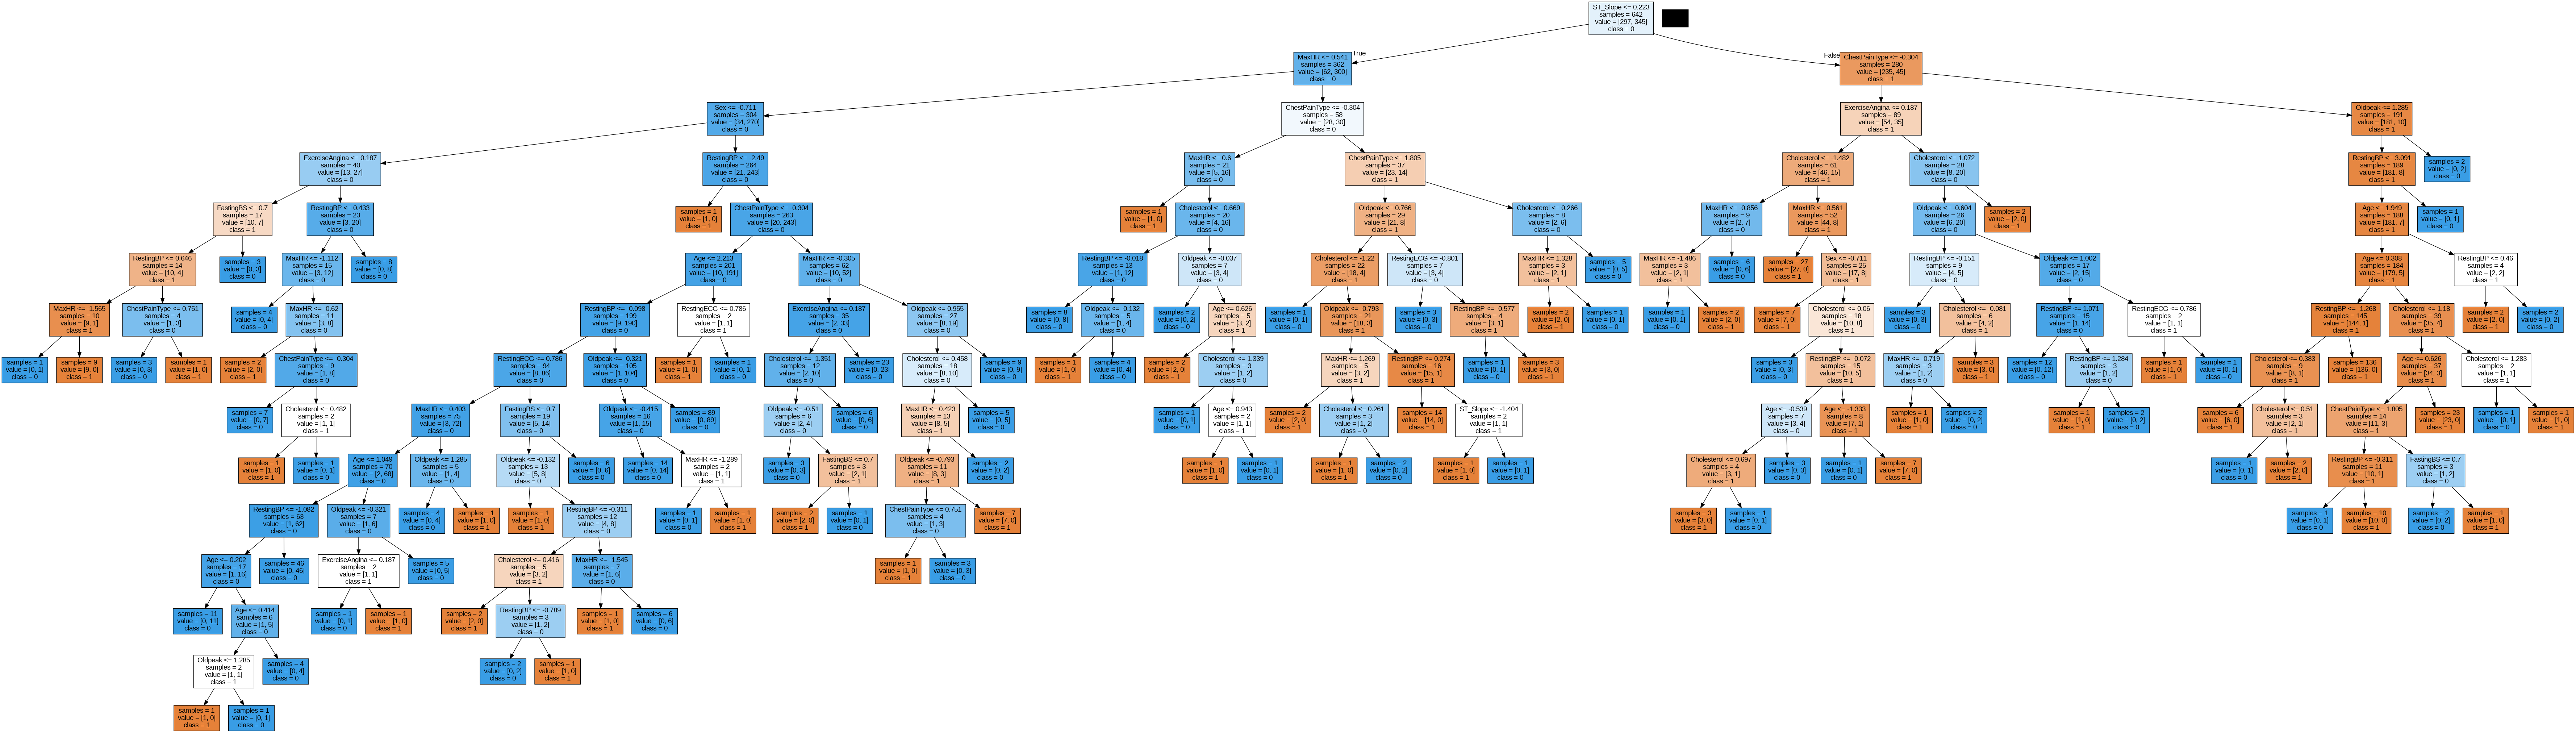

In [ ]:
Image(filename='tree_heart.png')

#### New Data Classification

In [ ]:
data.head()

NameError: ignored

In [ ]:
new_data1 = [[20,1, 3, 130, 200, 1, 2, 150, 0, 2.5, 1]]
new_data2 = [[33,0, 2, 142, 198, 0, 1, 161, 1, 1.2, 2]]
new_data3 = [[40,1, 0, 160, 240, 1, 0, 131, 0, 3.2, 1]]
new_data4 = [[40,1, 1, 140, 289, 0, 1, 172, 0, 0.0, 2]]

In [ ]:
new_data1 = sc.fit_transform(new_data1)
new_data2 = sc.fit_transform(new_data2)
new_data3 = sc.fit_transform(new_data3)
new_data4 = sc.fit_transform(new_data4)

In [ ]:
new_pred1 = classifier.predict(new_data1)
new_pred2 = classifier.predict(new_data2)
new_pred3 = classifier.predict(new_data3)
new_pred4 = classifier.predict(new_data4)

In [ ]:
print("Hasil Data 1: ", new_pred1)
print("Hasil Data 2: ", new_pred2)
print("Hasil Data 3: ", new_pred3)
print("Hasil Data 4: ", new_pred4)